In [1]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import bernoulli, cauchy, norm, gamma, poisson, binom, uniform, laplace, expon, trim_mean, iqr, beta, chi2_contingency, kstwobign, kstest, anderson
import statistics
from tqdm import tqdm
from matplotlib import rc
from math import pi, log, tan, sin
from scipy.optimize import minimize
import scipy.special
import statsmodels.api as sm
import pandas as pd


# 1


In [2]:
m, n = 1000, 1000
data = uniform.rvs(loc = 0, scale = 1, size = (m, n))
data = np.sort(data, axis = 1)
T =[-n - np.sum([(2*j -1) * (log(data[i][j-1])+ log(1 - data[i][n-j]))/ n for j in range(1, n+1)]) for i in range(m)]
with open('AD.txt', 'w') as f:
    f.writelines(f"{item}\n" for item in T)

In [3]:
with open('AD.txt', 'r') as file:
    lines = file.read().splitlines()
lines = list(map(float, lines))
F_AD = ECDF(lines)

In [4]:
m, n = 200, 200
r = np.arange(1,m+1)/m

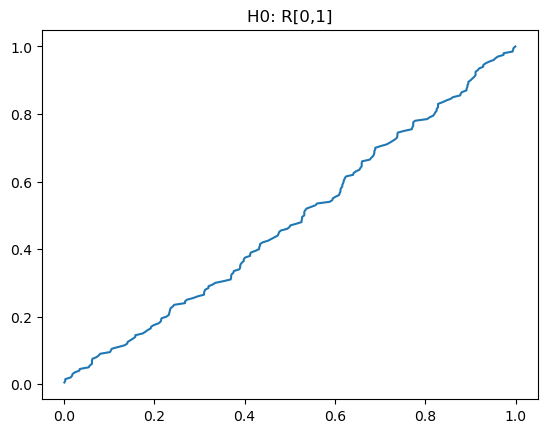

In [5]:
v = uniform.rvs(loc=0, scale=1, size=(m,n))
v = [np.sort(v[i]) for i in (range(m))]
T = [-n - np.sum([(2*j -1) * (log(uniform.cdf(v[i][j-1])) + log(1 - uniform.cdf(v[i][n-j])))/ n for j in range(1, n+1)]) for i in range(m)]
pv =  np.sort(1-F_AD(T))
plt.plot(pv, r)
plt.title('H0: R[0,1]')
plt.show()

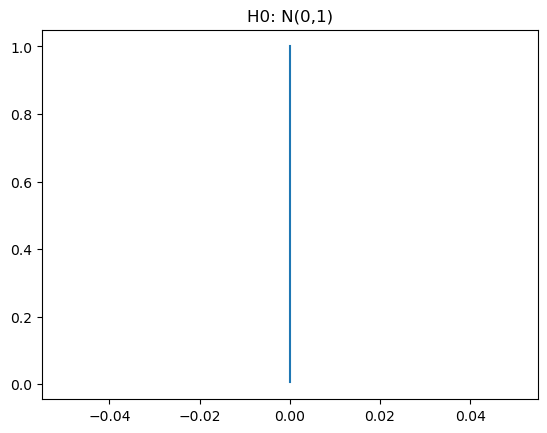

In [6]:
v = uniform.rvs(loc=0, scale=1, size=(m,n))
v = [np.sort(v[i]) for i in (range(m))]
T = [-n - np.sum([(2*j -1) * (log(norm.cdf(v[i][j-1]))+ log(1 - norm.cdf(v[i][n-j])))/ n for j in range(1, n+1)]) for i in range(m)]
pv =  np.sort(1-F_AD(T))
plt.plot(pv, r)
plt.title('H0: N(0,1)')
plt.show()

# 2

In [9]:
m, n = 10000, 100
data = norm.rvs(loc = 0, scale = 1, size = (m, n))
data = np.sort(data, axis = 1)
T =[-n - np.sum([(2*j -1) * (log(norm.cdf(data[i][j-1]))+ log(1 - norm.cdf(data[i][n-j])))/ n for j in range(1, n+1)]) for i in range(m)]
with open('AD_norm.txt', 'w') as f:
    f.writelines(f"{item}\n" for item in T)

In [10]:
with open('AD_norm.txt', 'r') as file:
    lines = file.read().splitlines()
lines = list(map(float, lines))
F_AD_norm = ECDF(lines)

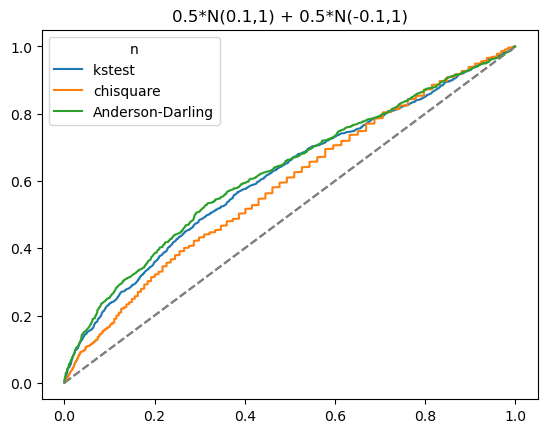

In [11]:
m = 1000
n = 100
mu = 0.10

p = bernoulli.rvs(0.5, size = (m, n))
n1 = norm.rvs(loc=mu, scale = 1, size = (m, n))
n2 = norm.rvs(loc=-mu, scale = 1, size = (m, n))
xa = [p[i]*n1[i] - (1-p[i])*n2[i] for i in range(m)]

# Критерий Колмогорова

r = np.arange(1,m+1)/m
pva = np.sort([kstest(xa[i], 'norm').pvalue for i in range(m)])
plt.plot(pva, r, label = f'kstest ')
plt.plot(r,r, linestyle='dashed', color='gray')
plt.legend(title="d")
plt.title(r'0.5*N(0.1,1) + 0.5*N(-0.1,1)')

# Критерий хи-квадрат

k=int(log(n)/log(2))
bins = [norm.ppf(i/k, loc = 0, scale =1 ) for i in range(k+1)]
obs = [pd.cut(xa[i], bins = bins).value_counts().tolist() for i in range(m)]
pva = np.sort([scipy.stats.chisquare(f_obs = obs[i]).pvalue for i in range(m)])
plt.plot(pva, r, label = f'chisquare')

# Критерий Андерсона-Дарлинга
xa = [np.sort(xa[i]) for i in (range(m))]
T = [-n - np.sum([(2*j -1) * (log(norm.cdf(xa[i][j-1]))+ log(1 - norm.cdf(xa[i][n-j])))/ n for j in range(1, n+1)]) for i in range(m)]
pva = np.sort(1-F_AD_norm(T))
plt.plot(pva, r, label = f'Anderson-Darling')
plt.plot(r,r, linestyle='dashed', color='gray')
plt.legend(title="n")
plt.title(r'0.5*N(0.1,1) + 0.5*N(-0.1,1)')
plt.show()
